In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [222]:
df=pd.read_csv('./retail_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [223]:
df=df.drop_duplicates()
df=df.dropna(axis=0)

In [224]:
df.shape

(779495, 10)

In [225]:
import datetime
df['date']=pd.to_datetime(df['InvoiceDate']).dt.strftime('%Y-%m-%d')
df['date']=pd.to_datetime(df['date'])


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   779495 non-null  int64         
 1   Invoice      779495 non-null  int64         
 2   StockCode    779495 non-null  object        
 3   Description  779495 non-null  object        
 4   Quantity     779495 non-null  int64         
 5   InvoiceDate  779495 non-null  object        
 6   Price        779495 non-null  float64       
 7   Customer ID  779495 non-null  float64       
 8   Country      779495 non-null  object        
 9   Revenue      779495 non-null  float64       
 10  date         779495 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 65.4+ MB


In [227]:
max_data=max(df.date)


In [228]:
max_data

Timestamp('2011-12-09 00:00:00')

In [229]:
last_four= df[df.date>'2011-08-1']

In [230]:
last_four.columns

Index(['Unnamed: 0', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Revenue', 'date'],
      dtype='object')

In [231]:
# last_fourl

In [232]:
last_four['revenue']=last_four['Quantity']*last_four['Price']

C:\Users\PS001028870\AppData\Local\Temp\ipykernel_34564\592859416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_four['revenue']=last_four['Quantity']*last_four['Price']


In [233]:
import inventorize3 as inv

In [234]:
a=last_four.groupby(['date','Description']).agg( total_daily=('Quantity','sum'), total_revenue=('Revenue','sum')).reset_index()

In [235]:
a

,date,Description,total_daily,total_revenue
0,2011-08-02,DOLLY GIRL BEAKER,12,15.00
1,2011-08-02,SPACEBOY BABY GIFT SET,2,33.90
2,2011-08-02,10 COLOUR SPACEBOY PEN,1,0.85
3,2011-08-02,12 COLOURED PARTY BALLOONS,20,13.00
4,2011-08-02,12 EGG HOUSE PAINTED WOOD,1,12.75
...,...,...,...,...
100902,2011-12-09,YOU'RE CONFUSING ME METAL SIGN,49,71.29
100903,2011-12-09,ZINC SWEETHEART SOAP DISH,12,9.48
100904,2011-12-09,ZINC T-LIGHT HOLDER STAR LARGE,12,11.40
100905,2011-12-09,ZINC WILLIE WINKIE CANDLE STICK,24,20.40


In [236]:
a

,date,Description,total_daily,total_revenue
0,2011-08-02,DOLLY GIRL BEAKER,12,15.00
1,2011-08-02,SPACEBOY BABY GIFT SET,2,33.90
2,2011-08-02,10 COLOUR SPACEBOY PEN,1,0.85
3,2011-08-02,12 COLOURED PARTY BALLOONS,20,13.00
4,2011-08-02,12 EGG HOUSE PAINTED WOOD,1,12.75
...,...,...,...,...
100902,2011-12-09,YOU'RE CONFUSING ME METAL SIGN,49,71.29
100903,2011-12-09,ZINC SWEETHEART SOAP DISH,12,9.48
100904,2011-12-09,ZINC T-LIGHT HOLDER STAR LARGE,12,11.40
100905,2011-12-09,ZINC WILLIE WINKIE CANDLE STICK,24,20.40


In [237]:
a

,date,Description,total_daily,total_revenue
0,2011-08-02,DOLLY GIRL BEAKER,12,15.00
1,2011-08-02,SPACEBOY BABY GIFT SET,2,33.90
2,2011-08-02,10 COLOUR SPACEBOY PEN,1,0.85
3,2011-08-02,12 COLOURED PARTY BALLOONS,20,13.00
4,2011-08-02,12 EGG HOUSE PAINTED WOOD,1,12.75
...,...,...,...,...
100902,2011-12-09,YOU'RE CONFUSING ME METAL SIGN,49,71.29
100903,2011-12-09,ZINC SWEETHEART SOAP DISH,12,9.48
100904,2011-12-09,ZINC T-LIGHT HOLDER STAR LARGE,12,11.40
100905,2011-12-09,ZINC WILLIE WINKIE CANDLE STICK,24,20.40


In [238]:
grouped=a.groupby(['Description']).agg(avg=('total_daily','mean'),sd=('total_daily','std'),total_sales= ('total_daily','sum'),total_revenue=('total_revenue','sum') ).reset_index()

In [239]:
grouped

,Description,avg,sd,total_sales,total_revenue
0,4 PURPLE FLOCK DINNER CANDLES,5.300000,6.105218,106,184.06
1,50'S CHRISTMAS GIFT BAG LARGE,31.416667,55.502112,1885,2272.25
2,DOLLY GIRL BEAKER,30.220779,73.815492,2327,2670.75
3,I LOVE LONDON MINI BACKPACK,8.159091,11.966898,359,1449.85
4,I LOVE LONDON MINI RUCKSACK,1.000000,NaN,1,4.15
...,...,...,...,...,...
3210,ZINC T-LIGHT HOLDER STARS SMALL,31.126582,37.681311,2459,1984.33
3211,ZINC TOP 2 DOOR WOODEN SHELF,1.000000,NaN,1,16.95
3212,ZINC WILLIE WINKIE CANDLE STICK,24.594203,30.790716,1697,1403.45
3213,ZINC WIRE KITCHEN ORGANISER,2.714286,2.984085,19,94.40


In [240]:
for_abc =inv.productmix(grouped['Description'],grouped['total_sales'],grouped['total_revenue'])

In [241]:
for_abc

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
1904,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.600,3.255850e-02,0.032559,3.932512e-02,0.039325,A,A,A_A
2158,RABBIT NIGHT LIGHT,24200,45651.300,9.727955e-03,0.053639,1.065618e-02,0.049981,A,A,A_A
2259,REGENCY CAKESTAND 3 TIER,3852,44817.750,1.548433e-03,0.325977,1.046161e-02,0.060443,A,A,A_A
1428,JUMBO BAG RED RETROSPOT,20974,39543.820,8.431162e-03,0.062070,9.230541e-03,0.069673,A,A,A_A
1898,PAPER CHAIN KIT 50'S CHRISTMAS,13080,35808.680,5.257919e-03,0.082639,8.358664e-03,0.078032,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...
1282,HAPPY BIRTHDAY CARD TEDDY/CAKE,5,0.950,2.009908e-06,0.999760,2.217544e-07,1.000000,C,C,C_C
3095,WHITE/PINK CHICK EASTER DECORATION,1,0.850,4.019816e-07,0.999994,1.984118e-07,1.000000,C,C,C_C
2403,SET 12 COLOURING PENCILS DOILEY,1,0.650,4.019816e-07,0.999998,1.517267e-07,1.000000,C,C,C_C
546,CHAMPAGNE TRAY BLANK CARD,3,0.570,1.205945e-06,0.999888,1.330526e-07,1.000000,C,C,C_C


In [242]:
 for_abc['product_mix'].value_counts()


product_mix
C_C    1455
A_A     487
B_B     330
C_B     241
B_C     230
A_B     228
B_A     169
A_C      41
C_A      34
Name: count, dtype: int64

In [243]:

lead_time=12

In [244]:
sd_leadtime=2

In [245]:
mappings= {
    'A_A':0.95,
    'A_C':0.95,
    'C_A':0.8,
    'A_B':0.95,
    'B_A':0.7,
    'B_C':0.75,
    'C_C':0.7,
    'B_B':0.7,
    'C_B':0.8,
}

In [246]:
for_abc['service_level']=for_abc['product_mix'].map(mappings)

In [247]:
for_abc.service_level.value_counts()

service_level
0.70    1954
0.95     756
0.80     275
0.75     230
Name: count, dtype: int64

In [248]:
abcd=for_abc[['D']]

KeyError: "None of [Index(['D'], dtype='object')] are in the [columns]"

In [249]:
for_abc

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix,service_level
1904,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.600,3.255850e-02,0.032559,3.932512e-02,0.039325,A,A,A_A,0.95
2158,RABBIT NIGHT LIGHT,24200,45651.300,9.727955e-03,0.053639,1.065618e-02,0.049981,A,A,A_A,0.95
2259,REGENCY CAKESTAND 3 TIER,3852,44817.750,1.548433e-03,0.325977,1.046161e-02,0.060443,A,A,A_A,0.95
1428,JUMBO BAG RED RETROSPOT,20974,39543.820,8.431162e-03,0.062070,9.230541e-03,0.069673,A,A,A_A,0.95
1898,PAPER CHAIN KIT 50'S CHRISTMAS,13080,35808.680,5.257919e-03,0.082639,8.358664e-03,0.078032,A,A,A_A,0.95
...,...,...,...,...,...,...,...,...,...,...,...
1282,HAPPY BIRTHDAY CARD TEDDY/CAKE,5,0.950,2.009908e-06,0.999760,2.217544e-07,1.000000,C,C,C_C,0.70
3095,WHITE/PINK CHICK EASTER DECORATION,1,0.850,4.019816e-07,0.999994,1.984118e-07,1.000000,C,C,C_C,0.70
2403,SET 12 COLOURING PENCILS DOILEY,1,0.650,4.019816e-07,0.999998,1.517267e-07,1.000000,C,C,C_C,0.70
546,CHAMPAGNE TRAY BLANK CARD,3,0.570,1.205945e-06,0.999888,1.330526e-07,1.000000,C,C,C_C,0.70


In [250]:
for_reorder = pd.merge(grouped, for_abc[['skus','service_level']],how='left',left_on='Description',right_on='skus' )

In [251]:
for_reorder

,Description,avg,sd,total_sales,total_revenue,skus,service_level
0,4 PURPLE FLOCK DINNER CANDLES,5.300000,6.105218,106,184.06,4 PURPLE FLOCK DINNER CANDLES,0.70
1,50'S CHRISTMAS GIFT BAG LARGE,31.416667,55.502112,1885,2272.25,50'S CHRISTMAS GIFT BAG LARGE,0.95
2,DOLLY GIRL BEAKER,30.220779,73.815492,2327,2670.75,DOLLY GIRL BEAKER,0.95
3,I LOVE LONDON MINI BACKPACK,8.159091,11.966898,359,1449.85,I LOVE LONDON MINI BACKPACK,0.70
4,I LOVE LONDON MINI RUCKSACK,1.000000,NaN,1,4.15,I LOVE LONDON MINI RUCKSACK,0.70
...,...,...,...,...,...,...,...
3210,ZINC T-LIGHT HOLDER STARS SMALL,31.126582,37.681311,2459,1984.33,ZINC T-LIGHT HOLDER STARS SMALL,0.95
3211,ZINC TOP 2 DOOR WOODEN SHELF,1.000000,NaN,1,16.95,ZINC TOP 2 DOOR WOODEN SHELF,0.70
3212,ZINC WILLIE WINKIE CANDLE STICK,24.594203,30.790716,1697,1403.45,ZINC WILLIE WINKIE CANDLE STICK,0.95
3213,ZINC WIRE KITCHEN ORGANISER,2.714286,2.984085,19,94.40,ZINC WIRE KITCHEN ORGANISER,0.70


In [252]:

n=for_reorder.shape[0]

In [253]:
from tqdm import tqdm
empty_df=[]
for i in range(n):

    desc,avg,sd,ts,tr,skus,service_lvl=list( for_reorder.iloc[i][:])
    as_data=inv.reorderpoint(avg,sd,lead_time,service_lvl)
    as_data['Description']=desc
    print(as_data)
    empty_df.append(as_data)
    
    

{'demandleadtime': np.float64(63.599999999999994), 'sigmadl': np.float64(21.149094792125638), 'safteyfactor': np.float64(0.5244005127080407), 'reorder_point': np.float64(74.69059615230164), 'Description': ' 4 PURPLE FLOCK DINNER CANDLES'}
{'demandleadtime': np.float64(377.0), 'sigmadl': np.float64(192.26495665961087), 'safteyfactor': np.float64(1.6448536269514722), 'reorder_point': np.float64(693.2477112972285), 'Description': " 50'S CHRISTMAS GIFT BAG LARGE"}
{'demandleadtime': np.float64(362.64935064935065), 'sigmadl': np.float64(255.70436674324756), 'safteyfactor': np.float64(1.6448536269514722), 'reorder_point': np.float64(783.2456057143108), 'Description': ' DOLLY GIRL BEAKER'}
{'demandleadtime': np.float64(97.9090909090909), 'sigmadl': np.float64(41.45455240903469), 'safteyfactor': np.float64(0.5244005127080407), 'reorder_point': np.float64(119.64787944647104), 'Description': ' I LOVE LONDON MINI BACKPACK'}
{'demandleadtime': np.float64(12.0), 'sigmadl': np.float64(nan), 'safteyf

In [254]:
empty_df=pd.DataFrame(empty_df)
empty_df.shape

(3215, 5)

In [255]:
empty_df.isna().sum()

demandleadtime      0
sigmadl           224
safteyfactor        0
reorder_point     224
Description         0
dtype: int64

In [256]:

empty_df

,demandleadtime,sigmadl,safteyfactor,reorder_point,Description
0,63.600000,21.149095,0.524401,74.690596,4 PURPLE FLOCK DINNER CANDLES
1,377.000000,192.264957,1.644854,693.247711,50'S CHRISTMAS GIFT BAG LARGE
2,362.649351,255.704367,1.644854,783.245606,DOLLY GIRL BEAKER
3,97.909091,41.454552,0.524401,119.647879,I LOVE LONDON MINI BACKPACK
4,12.000000,NaN,0.524401,NaN,I LOVE LONDON MINI RUCKSACK
...,...,...,...,...,...
3210,373.518987,130.531891,1.644854,588.224841,ZINC T-LIGHT HOLDER STARS SMALL
3211,12.000000,NaN,0.524401,NaN,ZINC TOP 2 DOOR WOODEN SHELF
3212,295.130435,106.662170,1.644854,470.574091,ZINC WILLIE WINKIE CANDLE STICK
3213,32.571429,10.337173,0.524401,37.992247,ZINC WIRE KITCHEN ORGANISER


In [257]:
all_data=pd.merge(for_reorder,empty_df,how='left')

In [258]:
all_data

,Description,avg,sd,total_sales,total_revenue,skus,service_level,demandleadtime,sigmadl,safteyfactor,reorder_point
0,4 PURPLE FLOCK DINNER CANDLES,5.300000,6.105218,106,184.06,4 PURPLE FLOCK DINNER CANDLES,0.70,63.600000,21.149095,0.524401,74.690596
1,50'S CHRISTMAS GIFT BAG LARGE,31.416667,55.502112,1885,2272.25,50'S CHRISTMAS GIFT BAG LARGE,0.95,377.000000,192.264957,1.644854,693.247711
2,DOLLY GIRL BEAKER,30.220779,73.815492,2327,2670.75,DOLLY GIRL BEAKER,0.95,362.649351,255.704367,1.644854,783.245606
3,I LOVE LONDON MINI BACKPACK,8.159091,11.966898,359,1449.85,I LOVE LONDON MINI BACKPACK,0.70,97.909091,41.454552,0.524401,119.647879
4,I LOVE LONDON MINI RUCKSACK,1.000000,NaN,1,4.15,I LOVE LONDON MINI RUCKSACK,0.70,12.000000,NaN,0.524401,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3210,ZINC T-LIGHT HOLDER STARS SMALL,31.126582,37.681311,2459,1984.33,ZINC T-LIGHT HOLDER STARS SMALL,0.95,373.518987,130.531891,1.644854,588.224841
3211,ZINC TOP 2 DOOR WOODEN SHELF,1.000000,NaN,1,16.95,ZINC TOP 2 DOOR WOODEN SHELF,0.70,12.000000,NaN,0.524401,NaN
3212,ZINC WILLIE WINKIE CANDLE STICK,24.594203,30.790716,1697,1403.45,ZINC WILLIE WINKIE CANDLE STICK,0.95,295.130435,106.662170,1.644854,470.574091
3213,ZINC WIRE KITCHEN ORGANISER,2.714286,2.984085,19,94.40,ZINC WIRE KITCHEN ORGANISER,0.70,32.571429,10.337173,0.524401,37.992247


In [259]:
all_data['safety_stock']=all_data['reorder_point']-all_data['demandleadtime']

In [260]:
import seaborn as sns

<Axes: xlabel='sd', ylabel='safety_stock'>

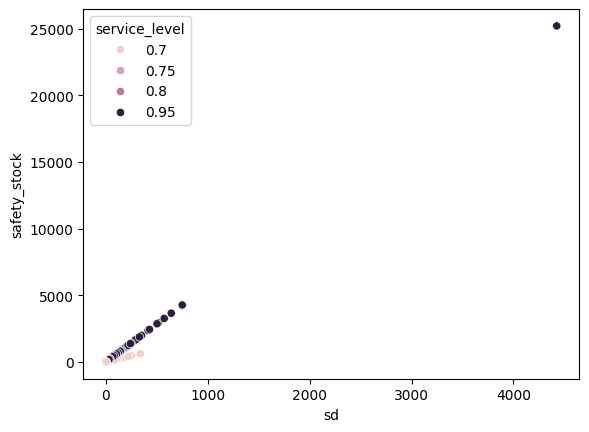

In [261]:
sns.scatterplot(x='sd',y='safety_stock',hue='service_level',data=all_data)

In [262]:
all_data

,Description,avg,sd,total_sales,total_revenue,skus,service_level,demandleadtime,sigmadl,safteyfactor,reorder_point,safety_stock
0,4 PURPLE FLOCK DINNER CANDLES,5.300000,6.105218,106,184.06,4 PURPLE FLOCK DINNER CANDLES,0.70,63.600000,21.149095,0.524401,74.690596,11.090596
1,50'S CHRISTMAS GIFT BAG LARGE,31.416667,55.502112,1885,2272.25,50'S CHRISTMAS GIFT BAG LARGE,0.95,377.000000,192.264957,1.644854,693.247711,316.247711
2,DOLLY GIRL BEAKER,30.220779,73.815492,2327,2670.75,DOLLY GIRL BEAKER,0.95,362.649351,255.704367,1.644854,783.245606,420.596255
3,I LOVE LONDON MINI BACKPACK,8.159091,11.966898,359,1449.85,I LOVE LONDON MINI BACKPACK,0.70,97.909091,41.454552,0.524401,119.647879,21.738789
4,I LOVE LONDON MINI RUCKSACK,1.000000,NaN,1,4.15,I LOVE LONDON MINI RUCKSACK,0.70,12.000000,NaN,0.524401,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3210,ZINC T-LIGHT HOLDER STARS SMALL,31.126582,37.681311,2459,1984.33,ZINC T-LIGHT HOLDER STARS SMALL,0.95,373.518987,130.531891,1.644854,588.224841,214.705854
3211,ZINC TOP 2 DOOR WOODEN SHELF,1.000000,NaN,1,16.95,ZINC TOP 2 DOOR WOODEN SHELF,0.70,12.000000,NaN,0.524401,NaN,NaN
3212,ZINC WILLIE WINKIE CANDLE STICK,24.594203,30.790716,1697,1403.45,ZINC WILLIE WINKIE CANDLE STICK,0.95,295.130435,106.662170,1.644854,470.574091,175.443656
3213,ZINC WIRE KITCHEN ORGANISER,2.714286,2.984085,19,94.40,ZINC WIRE KITCHEN ORGANISER,0.70,32.571429,10.337173,0.524401,37.992247,5.420819


In [263]:
# with leadtime variablity